In [1]:
import numpy as np
import pandas as pd

In [50]:
df= pd.read_csv('drug200.csv')

In [4]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [23]:
k=sorted(df["Cholesterol"].unique())
print(k)

['HIGH', 'NORMAL']


In [7]:
df["BP"].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [8]:
df["Drug"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [25]:
label_1 = {value: index for index, value in enumerate(sorted(df["Cholesterol"].unique()))}
print(label_1)

{'HIGH': 0, 'NORMAL': 1}


In [27]:
label_2 = {value: index for index, value in enumerate(sorted(df["BP"].unique()))}
print(label_2)

{'HIGH': 0, 'LOW': 1, 'NORMAL': 2}


In [28]:
label_3 = {value: index for index, value in enumerate(sorted(df["Drug"].unique()))}
print(label_3)

{'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}


In [29]:
label_4 = {value: index for index, value in enumerate(sorted(df["Sex"].unique()))}
print(label_4)

{'F': 0, 'M': 1}


In [43]:
df["Cholesterol"]=df["Cholesterol"].map(label_1)

In [44]:
df["BP"]=df["BP"].map(label_2)

In [45]:
df["Drug"]=df["Drug"].map(label_3)

In [48]:
df["Sex"]=df["Sex"].map(label_4)

In [49]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,NaN,0,0,25.355,4
1,47,NaN,1,0,13.093,2
2,47,NaN,1,0,10.114,2
3,28,NaN,2,0,7.798,3
4,61,NaN,1,0,18.043,4
...,...,...,...,...,...,...
195,56,NaN,1,0,11.567,2
196,16,NaN,1,0,12.006,2
197,52,NaN,2,0,9.894,3
198,23,NaN,2,1,14.020,3


In [54]:
msk = (df.dtypes == object)==True
msk

Age            False
Sex             True
BP              True
Cholesterol     True
Na_to_K        False
Drug            True
dtype: bool

In [55]:
for i in (df.dtypes == object):
    print(i)

False
True
True
True
False
True


In [56]:
df.select_dtypes(include='object').columns

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [58]:
for col in df.select_dtypes(include='object').columns:
    label = {value: index for index, value in enumerate(sorted(df[col].unique()))}
    df[col]=df[col].map(label)

In [59]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [62]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 435.7 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.6 kB 495.5 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.6 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 359.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 2.7 MB/s eta 0:00:04
   ---------------------------------------- 0.1/10.6 MB 2.7 MB/s eta 0:00:04
   ---------------------------------------- 0.1/10.6 MB 2.7 MB/s eta 0:00:04
   ---------------------------------------- 0.1/10.6 MB 901.1 kB/s eta 0:00:12
   ---------------------------------------- 0.1/10.6 MB 901.1 kB/s eta 0:00:12
   ---------------------------------------- 0.1/10.6 MB 901.1 kB/s eta 0:00:

In [63]:
from sklearn.model_selection import train_test_split

In [116]:
features=['Age','Sex','BP','Cholesterol','Na_to_K']
Target = 'Drug'
x=df[features]
y=df[Target]


In [117]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [118]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.4,random_state=5)

In [119]:
x_train.shape

(120, 5)

In [120]:
from  sklearn.tree import DecisionTreeClassifier

In [121]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [122]:
y_predict=clf.predict(x_test)

In [123]:
from sklearn.metrics import accuracy_score


In [124]:
accuracy_score(y_predict,y_test)

0.9875

In [125]:
accuracy_score(y_test,y_predict)

0.9875

In [126]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

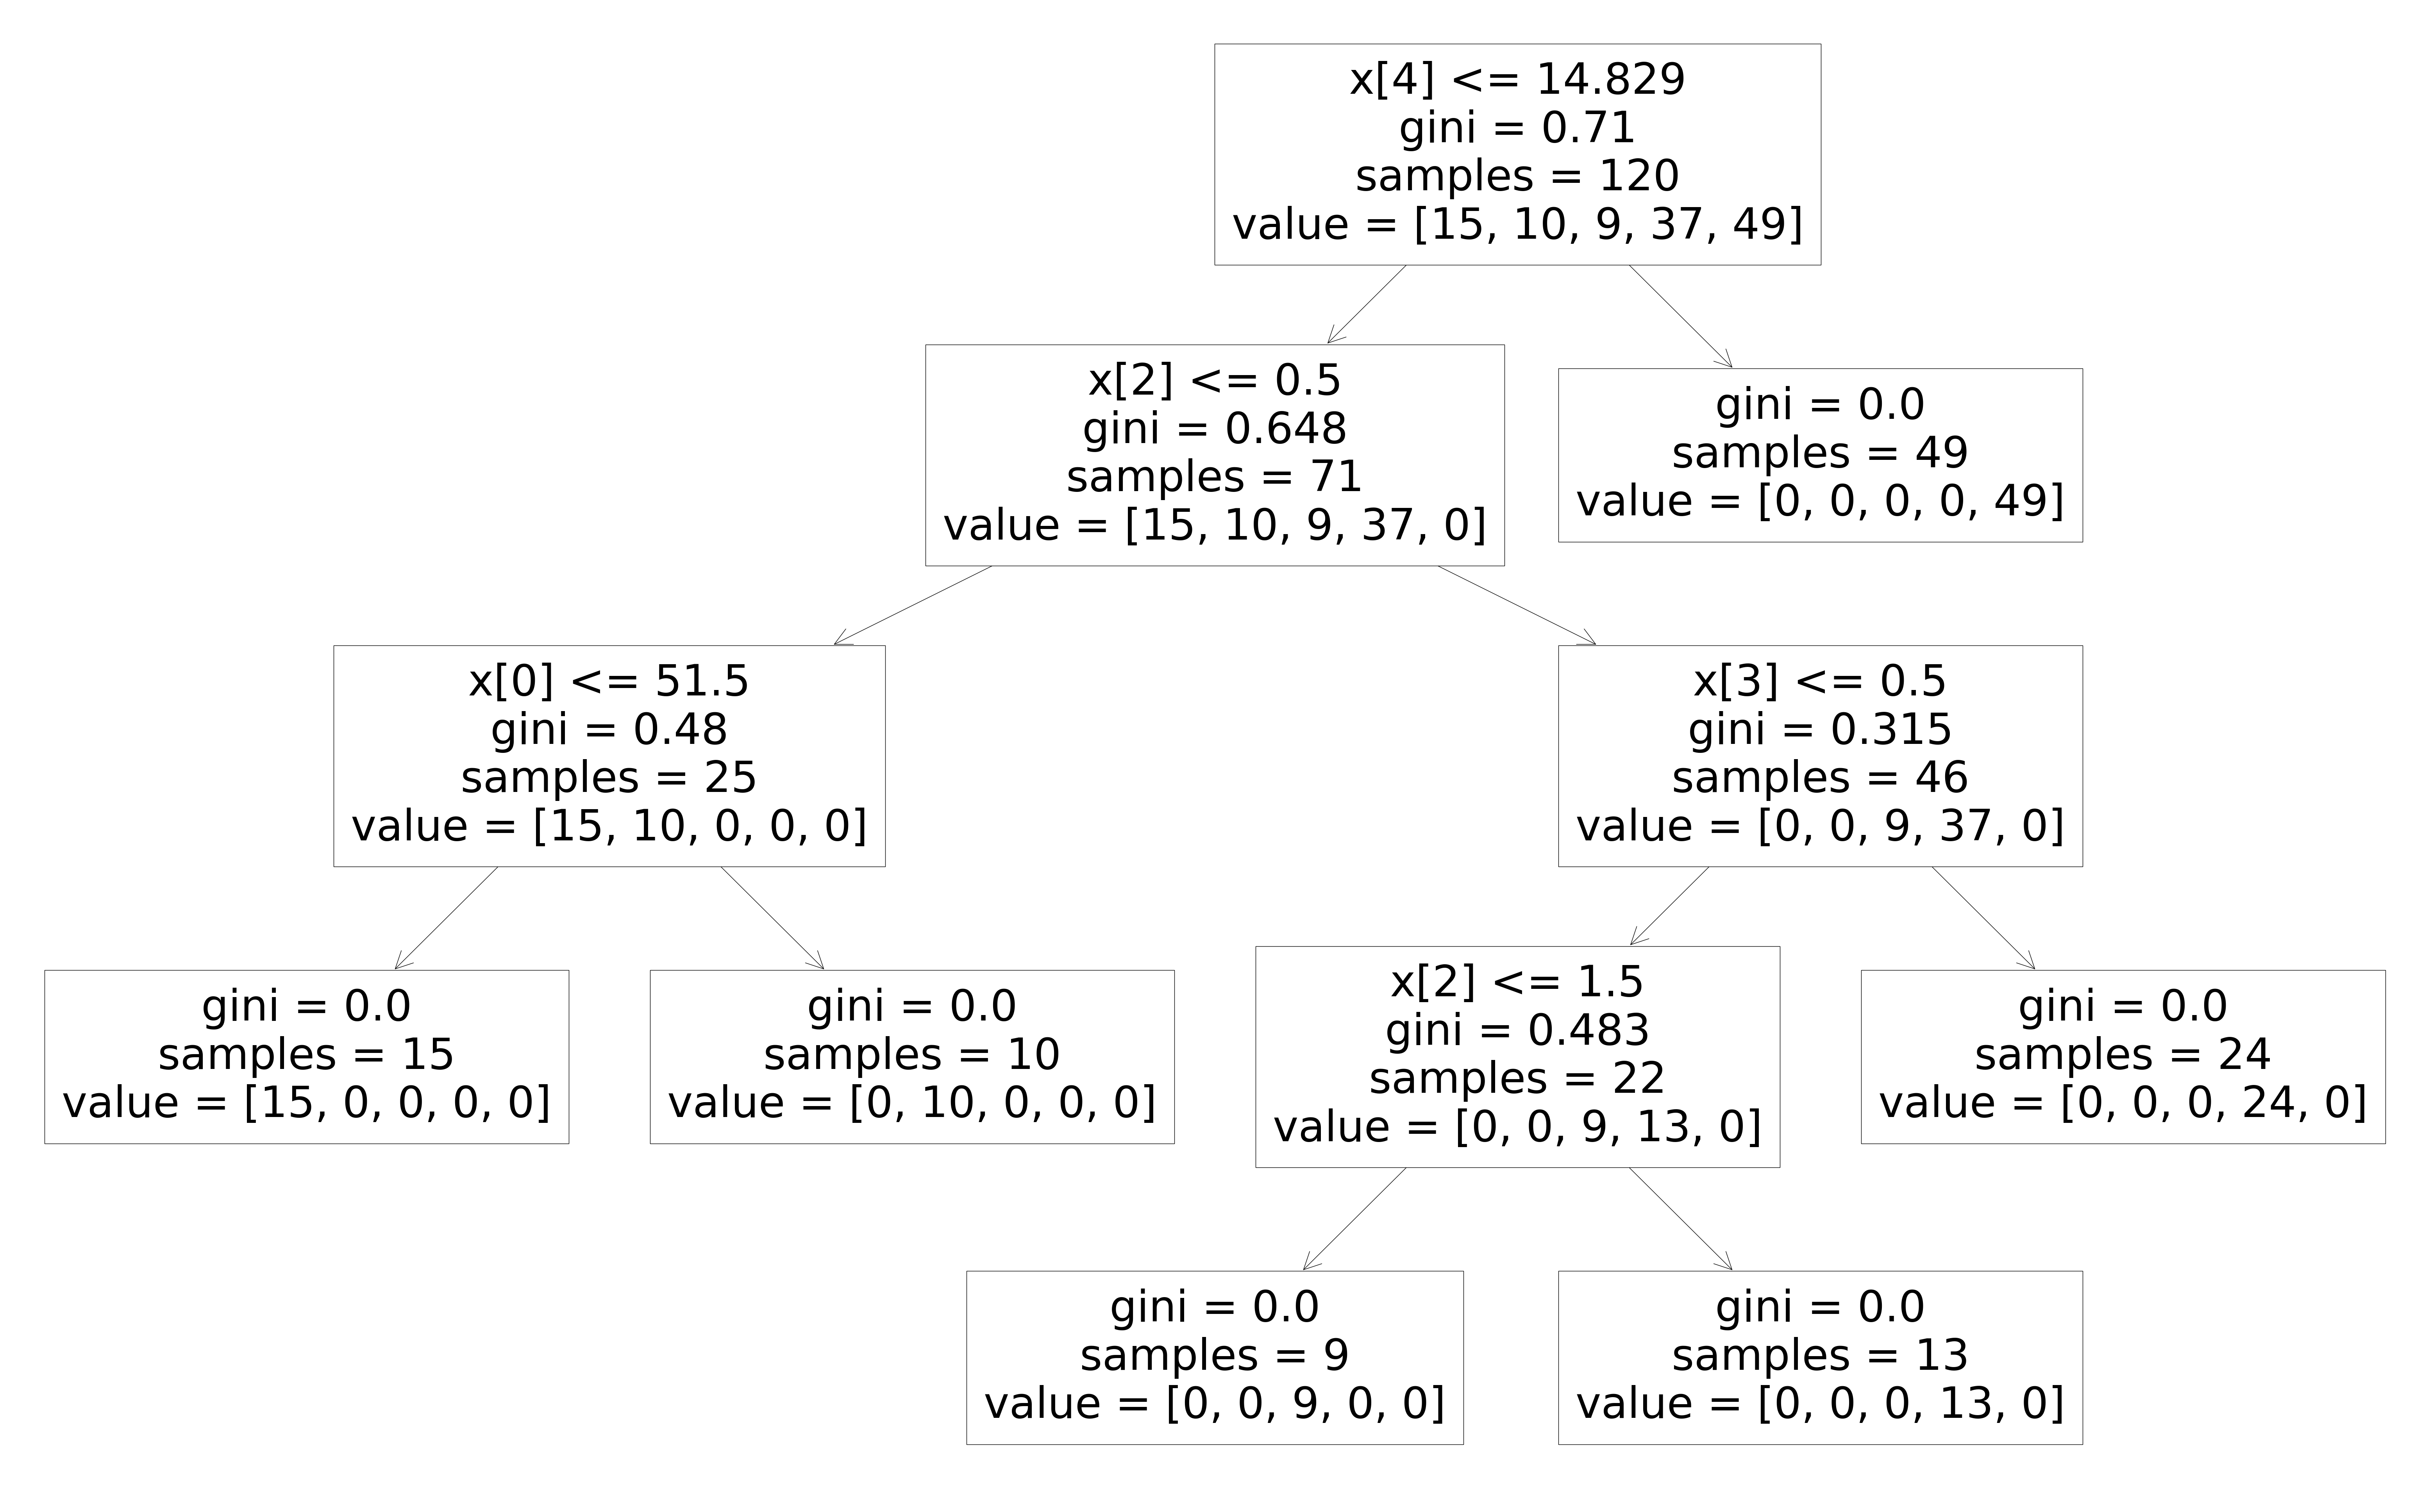

In [127]:
plt.figure(figsize=(80, 50))
plot_tree(clf)
plt.show()